In [49]:
import numpy as np

In [51]:
import matplotlib.pyplot as plt

In [53]:
from tensorflow.keras.datasets import mnist

In [55]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()


In [57]:
print("Training data shape:", x_train.shape)

Training data shape: (60000, 28, 28)


In [59]:
print("Training labels shape:", y_train.shape)

Training labels shape: (60000,)


In [61]:
print("Test data shape:", x_test.shape)

Test data shape: (10000, 28, 28)


In [63]:
print("Test labels shape:", y_test.shape)


Test labels shape: (10000,)


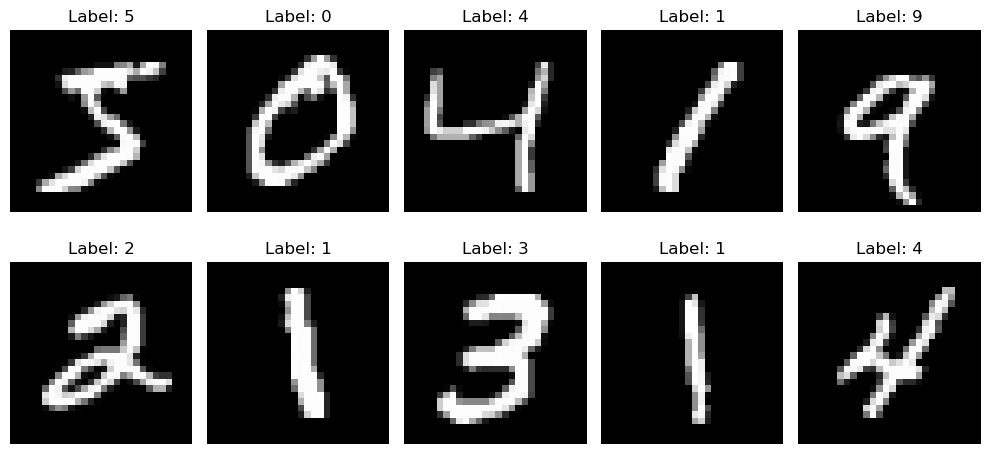

In [65]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.tight_layout()
plt.show()


In [66]:
unique, counts = np.unique(y_train, return_counts=True)
print("Label distribution in training set:")
for u, c in zip(unique, counts):
    print(f"Digit {u}: {c} samples")


Label distribution in training set:
Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


In [69]:
print("Data type:", x_train.dtype)
print("Min pixel value:", x_train.min())
print("Max pixel value:", x_train.max())


Data type: uint8
Min pixel value: 0
Max pixel value: 255


In [71]:
x_train_norm = x_train / 255.0
x_test_norm = x_test / 255.0


In [73]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input



In [75]:
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Create a simple neural network model
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Dense, Flatten

model = Sequential([
    Input(shape=(28, 28)),  # 👈 Recommended Input layer
    Flatten(),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(10, activation='softmax')
])


#  Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#  Train the model with batch size of 130
history = model.fit(x_train, y_train,
                    batch_size=130,
                    epochs=10,
                    validation_split=0.1,
                    verbose=2)

#  Evaluate on the test set
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 1/10
416/416 - 5s - 11ms/step - accuracy: 0.8385 - loss: 3.5234 - val_accuracy: 0.9123 - val_loss: 0.6859
Epoch 2/10
416/416 - 1s - 4ms/step - accuracy: 0.9188 - loss: 0.5651 - val_accuracy: 0.9383 - val_loss: 0.3681
Epoch 3/10
416/416 - 1s - 3ms/step - accuracy: 0.9379 - loss: 0.3198 - val_accuracy: 0.9435 - val_loss: 0.3158
Epoch 4/10
416/416 - 1s - 3ms/step - accuracy: 0.9511 - loss: 0.2140 - val_accuracy: 0.9515 - val_loss: 0.2491
Epoch 5/10
416/416 - 1s - 3ms/step - accuracy: 0.9592 - loss: 0.1641 - val_accuracy: 0.9527 - val_loss: 0.2340
Epoch 6/10
416/416 - 1s - 4ms/step - accuracy: 0.9646 - loss: 0.1332 - val_accuracy: 0.9550 - val_loss: 0.2263
Epoch 7/10
416/416 - 1s - 4ms/step - accuracy: 0.9689 - loss: 0.1140 - val_accuracy: 0.9562 - val_loss: 0.2374
Epoch 8/10
416/416 - 2s - 4ms/step - accuracy: 0.9695 - loss: 0.1082 - val_accuracy: 0.9615 - val_loss: 0.2122
Epoch 9/10
416/416 - 1s - 4ms/step - accuracy: 0.9724 - loss: 0.1017 - val_accuracy: 0.9618 - val_loss: 0.1925


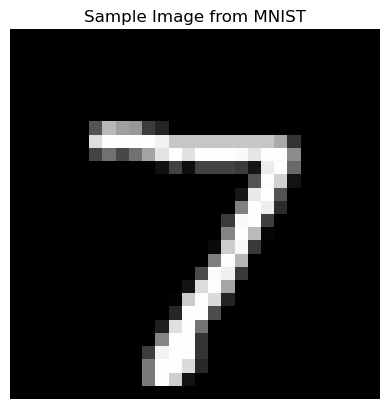

In [77]:
import matplotlib.pyplot as plt

# Show the actual image
plt.imshow(x_test[0], cmap='gray')
plt.title("Sample Image from MNIST")
plt.axis('off')
plt.show()


In [79]:
sample_input = np.expand_dims(x_test[0], axis=0)

# Predict using the model
prediction = model.predict(sample_input)

# Print predicted class and probability
predicted_class = np.argmax(prediction[0])
confidence = prediction[0][predicted_class]

print("Predicted Digit:", predicted_class)
print("Confidence:", f"{confidence:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
Predicted Digit: 7
Confidence: 1.00
